In [ ]:
import random
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
data=pd.read_csv('Cleandata.csv')

In [ ]:
data=data.drop(columns=data.columns[0:2])

In [ ]:
rows_with_nan = data[data.isnull().any(axis=1)]

data = data.dropna(axis=0, how='any')

In [ ]:
data['Year'] = data['Year']-2016
label_encoder = preprocessing.LabelEncoder()
data["Street"] = label_encoder.fit_transform(data["Street"])
data["City"] = label_encoder.fit_transform(data["City"])
data["County"] = label_encoder.fit_transform(data["County"])
data["State"] = label_encoder.fit_transform(data["State"])
data["Airport_Code"] = label_encoder.fit_transform(data["Airport_Code"])
data["Traffic_Signal"] = label_encoder.fit_transform(data["Traffic_Signal"])
data["Sunrise_Sunset"] = label_encoder.fit_transform(data["Sunrise_Sunset"])
data["Weather_Condition"] = label_encoder.fit_transform(data["Weather_Condition"])
data["Wind_Direction"] = label_encoder.fit_transform(data["Wind_Direction"])
data

,Year,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset,TimeDiff
0,0,2,39.063148,-84.032608,0.010,41040,7564,261,33,813,36.0,33.3,10.0,15,57,1,1,30.0
1,0,3,39.747753,-84.205582,0.010,23281,1663,832,33,432,35.1,31.0,9.0,15,54,0,1,30.0
2,0,2,39.627781,-84.188354,0.010,27444,1663,832,33,1052,36.0,33.3,6.0,15,54,1,0,30.0
3,0,3,40.100590,-82.925194,0.010,46765,7468,434,33,351,37.9,35.5,7.0,14,40,0,0,30.0
4,0,2,39.758274,-84.230507,0.000,30356,1663,832,33,432,34.0,31.0,7.0,21,57,0,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314280,1,2,28.879630,-82.092960,0.722,23281,7556,1213,8,1684,80.0,80.0,10.0,17,44,0,0,360.0
314281,1,2,37.993881,-92.795869,0.000,41642,940,183,22,731,75.0,75.0,10.0,5,4,0,0,360.0
314282,1,2,46.617235,-113.051251,0.000,43111,1827,487,24,30,89.0,89.0,3.0,13,13,0,0,360.0
314283,1,4,46.672100,-113.153690,9.486,43111,1827,487,24,30,57.0,57.0,4.0,0,13,0,1,360.0


In [ ]:
data=data.drop(columns=['Street','County','Start_Lat','Start_Lng','City'])


In [ ]:
features=[]
for i in data.columns:
  if(i != 'Severity'):
    features.append(i)



In [ ]:
X=data[features]
y=data['Severity']

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(32,),batch_size=1000,max_iter=1000, random_state=42,learning_rate_init=0.001,solver='adam' ,activation='logistic')
# mlp.fit(X_train, y_train)


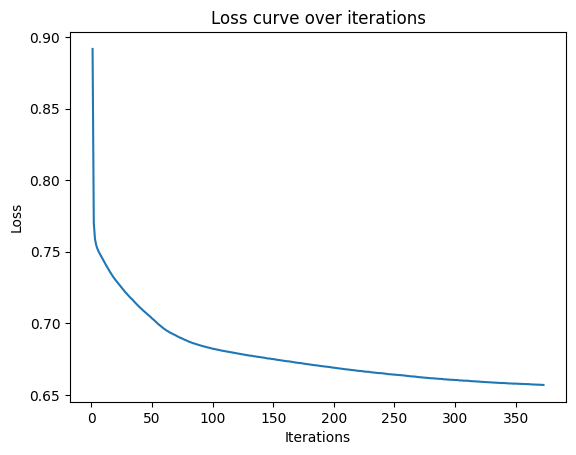

In [ ]:
# _model = MLPClassifier(**best_parameters, activation=best_func, max_iter=100, random_state=42,verbose=False)
  # Fit the model on the training data
history=mlp.fit(X_train, y_train)
loss_values = history.loss_curve_
# Plotting the loss curve
plt.plot(np.arange(1, len(loss_values) + 1), loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss curve over iterations')
plt.show()

Accuracy on training set:  0.6778076263983018
Accuracy on the test set:  0.6790191544874107


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        35
           2       0.70      0.88      0.78     59003
           3       0.61      0.37      0.46     30754
           4       0.54      0.16      0.25      4494

    accuracy                           0.68     94286
   macro avg       0.46      0.35      0.37     94286
weighted avg       0.66      0.68      0.65     94286



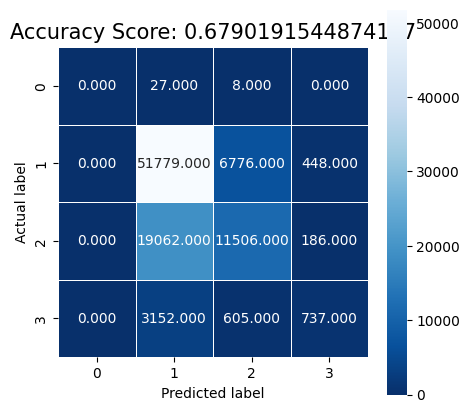

In [ ]:
predictions = mlp.predict(X_test)
print('Accuracy on training set: ',mlp.score(X_train, y_train))
print('Accuracy on the test set: ', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
# Plot a confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions))
plt.title(all_sample_title, size = 15)
plt.savefig('MLP.png')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy }")

Accuracy: 0.7283683504693786
